<a href="https://colab.research.google.com/github/huyhoang1996vn/my-ml/blob/master/PolyNomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

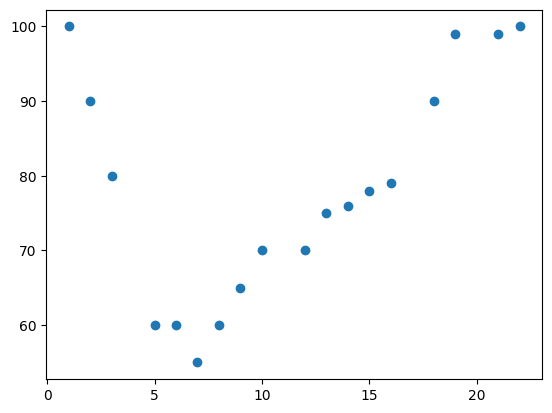

In [1]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.DataFrame({'x': x, 'y': y})
# display(df)
df.describe()

,x,y
count,18.000000,18.000000
mean,11.166667,78.111111
std,6.528219,15.250415
min,1.000000,55.000000
25%,6.250000,66.250000
50%,11.000000,77.000000
75%,15.750000,90.000000
max,22.000000,100.000000


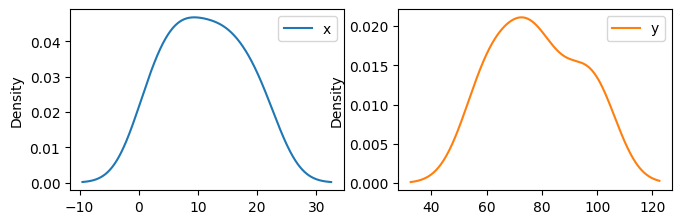

In [4]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(12, 8))
plt.show()

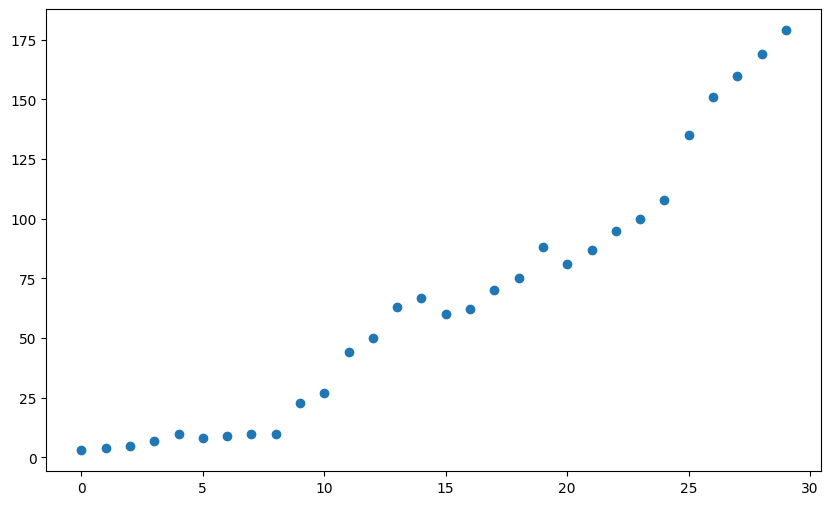

In [5]:
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree=2, include_bias=False)

In [25]:
x.reshape(-1, 1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29]])

In [24]:
squared_x_features = poly_feature.fit_transform(x.reshape(-1, 1))
squared_x_features

array([[  0.,   0.],
       [  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.],
       [  6.,  36.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 11., 121.],
       [ 12., 144.],
       [ 13., 169.],
       [ 14., 196.],
       [ 15., 225.],
       [ 16., 256.],
       [ 17., 289.],
       [ 18., 324.],
       [ 19., 361.],
       [ 20., 400.],
       [ 21., 441.],
       [ 22., 484.],
       [ 23., 529.],
       [ 24., 576.],
       [ 25., 625.],
       [ 26., 676.],
       [ 27., 729.],
       [ 28., 784.],
       [ 29., 841.]])

Linear Models: The LinearRegression model in scikit-learn, while named "Linear," can actually fit non-linear relationships if you provide it with non-linear features.

Creating Polynomial Features: To fit a polynomial curve using a linear model, you need to create new features that are powers of your original feature. In your code, PolynomialFeatures(degree=2) is used to create a new feature that is the square of the original x feature (x²).

In [30]:
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(squared_x_features, y)


LinearRegression()

In [31]:
y_predicted = poly_reg_model.predict(squared_x_features)

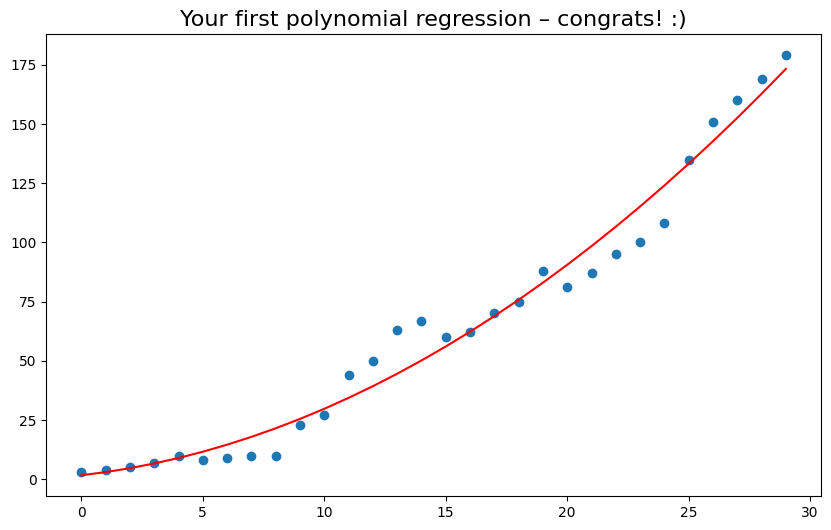

In [32]:
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
r2=r2_score(y, y_predicted)
print(f"R-squared: {r2:.4f}")
mse = mean_squared_error(y, y_predicted)
print(f"Mean squared error: {mse:.4f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.9742
Mean squared error: 72.4864
Root mean squared error: 8.5139


In [34]:
import numpy as np

# Tính phạm vi của y thực tế (target_test)
y_range = np.max(y) - np.min(y_predicted)
# Tính ngưỡng 5-10% của phạm vi
good_threshold = 0.05 * y_range
acceptable_threshold = 0.10 * y_range

print(f"Phạm vi y: {y_range}")
print(f"RMSE tốt (5% phạm vi): < {good_threshold}")
print(f"RMSE chấp nhận được (10% phạm vi): < {acceptable_threshold}")
print(f"RMSE của bạn: {rmse}")

Phạm vi y: 177.29193548387096
RMSE tốt (5% phạm vi): < 8.864596774193549
RMSE chấp nhận được (10% phạm vi): < 17.729193548387098
RMSE của bạn: 8.513893513153885
